# Advanced Data Analysis
- Replace values
- Metadata Analysis
- Analysis and Reporting

In [1]:
### Import packages
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import xport  ## write sas datasets to local drive

## Replacing Values
### Replacing with new variables

In [39]:
## Set up relacing values 
code_to_severity = {
    1 : 'Mild', 2 : 'Moderate', 3:'Severe'
}

In [40]:
## set up raw data frame
raw1 = {'subjid': ['01-001', '01-002', '01-003', '01-004'],
        'severity code': [1,2,2,3],
       }
df1 = pd.DataFrame(raw1)
print(df1)

   subjid  severity code
0  01-001              1
1  01-002              2
2  01-003              2
3  01-004              3


In [41]:
df1['Severity Desc']= df1['severity code'].map(code_to_severity)
print(df1)

   subjid  severity code Severity Desc
0  01-001              1          Mild
1  01-002              2      Moderate
2  01-003              2      Moderate
3  01-004              3        Severe


### Replacing the current variables

In [45]:
## ceate new data frame
raw1 = {'subjid': ['01-001', '01-002', '01-003', '01-004'],
        'severity code': [1,2,2,3],
       }
df2 = pd.DataFrame(raw1)
print(df2)

   subjid  severity code
0  01-001              1
1  01-002              2
2  01-003              2
3  01-004              3


In [47]:
## replace the values with the current variables
df3 = df2.replace([1,2,3],['Mild','Moderate','Severe'])
print(df3)

   subjid severity code
0  01-001          Mild
1  01-002      Moderate
2  01-003      Moderate
3  01-004        Severe


## Metadata of DataFrame

In [15]:
import xport  ## write sas datasets to local drive
from sas7bdat import SAS7BDAT  ## read SAS datasets from local drive

In [16]:
## Read SAS datasets
with SAS7BDAT('./data/raw/adtteos.sas7bdat') as file: 
    df_tteos = file.to_data_frame()

In [17]:
## Metadata of input data
print("Information of input data:"); print(df_tteos.info())
print("\n Description of numeric columns of input data: \n", df_tteos.describe())
print("\n List of columns: \n ", df_tteos.columns)
print("\n Shape of input data: \n", df_tteos.shape) ## 300 records and 17 columns

Information of input data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
SUBJID      300 non-null object
SITEID      300 non-null object
FASFL       300 non-null object
SAFFL       300 non-null object
TRTP        300 non-null object
TRTPN       300 non-null float64
PARAM       300 non-null object
PARAMCD     300 non-null object
PARAMTYP    300 non-null object
AVISIT      300 non-null object
AVISITN     300 non-null float64
AVAL        300 non-null float64
STARTDT     300 non-null object
ADT         300 non-null object
ADTF        300 non-null object
CNSR        300 non-null float64
EVNTDESC    300 non-null object
dtypes: float64(4), object(13)
memory usage: 39.9+ KB
None

 Description of numeric columns of input data: 
             TRTPN  AVISITN        AVAL        CNSR
count  300.000000    300.0  300.000000  300.000000
mean     1.506667     91.0   45.620000    0.343333
std      0.500791      0.0   33.842972    0.475615
min    

In [18]:
## first and last 5 records
print("\nFirst five data: \n", df_tteos.head())
print("\nLast five data: \n", df_tteos.tail())


First five data: 
     SUBJID SITEID FASFL SAFFL        TRTP  TRTPN          PARAM PARAMCD  \
0  310-001    310     Y     Y     Control    1.0  Days to Death   DEATH   
1  310-002    310     Y     Y     Control    1.0  Days to Death   DEATH   
2  310-003    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
3  310-004    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
4  310-005    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   

  PARAMTYP               AVISIT  AVISITN  AVAL     STARTDT         ADT ADTF  \
0  DERIVED  Double-Blind Period     91.0   1.0  2007-11-12  2007-11-12        
1  DERIVED  Double-Blind Period     91.0  83.0  2008-01-11  2008-04-02        
2  DERIVED  Double-Blind Period     91.0  84.0  2008-02-01  2008-04-24        
3  DERIVED  Double-Blind Period     91.0   9.0  2008-02-07  2008-02-15        
4  DERIVED  Double-Blind Period     91.0  51.0  2008-02-21  2008-04-11        

   CNSR                       EVNTDESC  
0   0.0      

### Groupby function
df_tteos.groupby(['TRTP', 'SITEID'])['SUBJID'].count()) <br>
is similar to <br>
proc sql; select trtp, siteid, count(subjid) from df_tteos group by trtp, siteid;

In [19]:
## Frequency of columns
print("Frequency count of TRTP : \n", df_tteos['TRTP'].value_counts())
print("\nFrequency count of Subjects by TRTP and SITEID: \n", df_tteos.groupby(['TRTP', 'SITEID'])['SUBJID'].count())  

Frequency count of TRTP : 
 Study Drug    152
Control       148
Name: TRTP, dtype: int64

Frequency count of Subjects by TRTP and SITEID: 
 TRTP        SITEID
Control     310        5
            311       18
            313       16
            314       14
            315       10
            316        2
            317        2
            318        3
            319        7
            320       15
            321        1
            323       11
            325       12
            326       11
            327        2
            328        9
            340        4
            341        2
            342        2
            343        2
Study Drug  310        6
            311       18
            313       17
            314       13
            315       10
            316        3
            317        1
            318        5
            319        8
            320       15
            321        2
            323       14
            325       11
            326 

In [20]:
## other gropuby function
print("\nAverage of time to event day per treatment: \n", df_tteos.groupby(['TRTP'])['AVAL'].mean())  
print("\nDescriptive statistics per treatment: \n", df_tteos.groupby(['TRTP'])['AVAL'].describe()) 


Average of time to event day per treatment: 
 TRTP
Control       45.729730
Study Drug    45.513158
Name: AVAL, dtype: float64

Descriptive statistics per treatment: 
             count       mean        std  min    25%   50%   75%   max
TRTP                                                                 
Control     148.0  45.729730  34.319546  1.0  10.75  40.5  84.0  96.0
Study Drug  152.0  45.513158  33.485588  1.0  13.00  45.0  83.0  92.0


## Statistics Analysis

In [48]:
## import python stat packages
from scipy import stats

### Pair t-test

In [52]:
## Data preparation
Control_val = df_tteos[df_tteos['TRTP']=='Control']['AVAL']
StudyDrug_val = df_tteos[df_tteos['TRTP']=='Study Drug']['AVAL']
print(Control_val.head())
print(StudyDrug_val.head())

0      1.0
1     83.0
5     62.0
7      3.0
10    85.0
Name: AVAL, dtype: float64
2    84.0
3     9.0
4    51.0
6    69.0
8     5.0
Name: AVAL, dtype: float64


In [23]:
## pair t-test
stats.ttest_ind(Control_val, StudyDrug_val)

Ttest_indResult(statistic=0.0553223058850432, pvalue=0.9559187636178077)

### Fisher Exact Test

In [24]:
## Read SAS datasets
with open('./data/raw/adsl.xpt', 'rb') as f: 
    _xport_adsl = xport.to_columns(f)
    df_adsl = pd.DataFrame(_xport_adsl) 
    

In [25]:
df_adsl.head()

USUBJID       STUDYID DOMAIN SITEID SITEGRP SUBJID  VISIT1DT   RANDDT  \
0  01-701-1015  CDISCPILOT01   ADSL    701     701   1015   19718.0  19725.0   
1  01-701-1023  CDISCPILOT01   ADSL    701     701   1023   19196.0  19210.0   
2  01-701-1028  CDISCPILOT01   ADSL    701     701   1028   19550.0  19558.0   
3  01-701-1033  CDISCPILOT01   ADSL    701     701   1033   19792.0  19800.0   
4  01-701-1034  CDISCPILOT01   ADSL    701     701   1034   19898.0  19905.0   

   TRTSTDT     RFSTDTC  ...  EDUCLVL  HEIGHTBL MMSETOT  WEIGHTBL SAFETY ITT  \
0  19725.0  2014-01-02  ...     16.0     147.3    23.0      54.4      Y   Y   
1  19210.0  2012-08-05  ...     14.0     162.6    23.0      80.3      Y   Y   
2  19558.0  2013-07-19  ...     16.0     177.8    23.0      99.3      Y   Y   
3  19800.0  2014-03-18  ...     12.0     175.3    23.0      88.5      Y   Y   
4  19905.0  2014-07-01  ...      9.0     154.9    21.0      62.6      Y   Y   

  EFFICACY COMPLT24 COMPLT16  COMPLT8  
0        Y        Y        Y        Y  
1        Y        N        N        N  
2        Y        Y        Y        Y  
3        Y        N        N        N  
4        Y        Y        Y        Y  

[5 rows x 51 columns]

In [26]:
df_adsl.columns

Index(['USUBJID', 'STUDYID', 'DOMAIN', 'SITEID', 'SITEGRP', 'SUBJID',
       'VISIT1DT', 'RANDDT', 'TRTSTDT', 'RFSTDTC', 'LSTDOSDT', 'ENDDT',
       'RFENDTC', 'VISNUMEN', 'DISCONT', 'DSDECOD', 'DSREASAE', 'DSREASCD',
       'DEATH', 'TRTDUR', 'TRTP', 'TRTPCD', 'TRTPN', 'TRTDOSE', 'AVGDD',
       'CUMDOSE', 'ARM', 'ARMCD', 'ARMN', 'AGE', 'AGEGRP', 'AGEGRPN', 'AGEU',
       'RACE', 'RACEN', 'SEX', 'BMIBL', 'BMIBLGRP', 'DISONSET', 'DURDIS',
       'DURDISGR', 'EDUCLVL', 'HEIGHTBL', 'MMSETOT', 'WEIGHTBL', 'SAFETY',
       'ITT', 'EFFICACY', 'COMPLT24', 'COMPLT16', 'COMPLT8'],
      dtype='object')

In [27]:
## Data Preparation 
df_adsl['TRTP1'] = df_adsl.TRTP.replace(['Xanomeline High Dose', 'Xanomeline Low Dose'],['Xanomeline','Xanomeline']) ## conversion
count = df_adsl.groupby(['TRTP1','DISCONT'])['SUBJID'].count()  ## occurence count of treatment and discontinuation
print("Catoegorical results of trtment and discontinuation: \n", count)
print(type(count))

Catoegorical results of trtment and discontinuation: 
 TRTP1       DISCONT
Placebo                 58
            Y           28
Xanomeline              52
            Y          116
Name: SUBJID, dtype: int64
<class 'pandas.core.series.Series'>


In [28]:
count.values.reshape(2,2) ## convert values of Series to numpy with 2 by 2 shape

array([[ 58,  28],
       [ 52, 116]], dtype=int64)

In [29]:
## Fisher Exact Test
oddsratio, pvalue = stats.fisher_exact(count.values.reshape(2,2)) ## 2 by 2 array is an input.  
print("Odds Ratio : \n", oddsratio)
print("P value: \n", pvalue)

Odds Ratio : 
 4.6208791208791204
P value: 
 3.189001514988957e-08


### Survival analysis - log rank test

In [30]:
## import lifeline logrank test function
from lifelines.statistics import logrank_test ## need to install lifelines(pip install lifelines)

In [31]:
df_tteos.groupby(['TRTP']).count()

SUBJID  SITEID  FASFL  SAFFL  TRTPN  PARAM  PARAMCD  PARAMTYP  \
TRTP                                                                        
Control        148     148    148    148    148    148      148       148   
Study Drug     152     152    152    152    152    152      152       152   

            AVISIT  AVISITN  AVAL  STARTDT  ADT  ADTF  CNSR  EVNTDESC  
TRTP                                                                   
Control        148      148   148      148  148   148   148       148  
Study Drug     152      152   152      152  152   152   152       152

In [32]:
tte_control = df_tteos[df_tteos['TRTP']=='Control'][['TRTP','AVAL','CNSR']]
print("Treatment data occurrence : ", tte_control.groupby(['TRTP']).count())

tte_sd = df_tteos[df_tteos['TRTP']=='Study Drug'][['TRTP','AVAL','CNSR']]
print("Treatment data occurrence : ", tte_sd.groupby(['TRTP']).count())

Treatment data occurrence :           AVAL  CNSR
TRTP               
Control   148   148
Treatment data occurrence :              AVAL  CNSR
TRTP                  
Study Drug   152   152


In [33]:
results = logrank_test(tte_control['AVAL'], tte_sd['AVAL'], event_observed_A=tte_control['CNSR'], event_observed_B=tte_sd['AVAL'], alpha=.95)

results.print_summary()
print("p-value of log rank test on adtteos : ", results.p_value)

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
 test_statistic      p  -log2(p)
          57.92 <0.005     45.06
p-value of log rank test on adtteos :  2.725523833814784e-14


### Survival analysis - Kaplan Meier Curves

Text(0.5, 1.0, 'Kaplan Meier curves between Control and Study Drug')

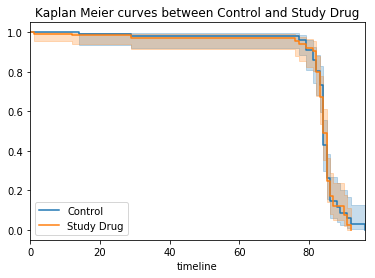

In [34]:
### Import lifelines and Kaplan Meier Curves 
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt ## import plotting library
%matplotlib inline 

kmf = KaplanMeierFitter()

ax = plt.subplot(111)

kmf.fit(tte_control.AVAL, event_observed=tte_control.CNSR, label="Control")
kmf.plot(ax=ax)
kmf.fit(tte_sd.AVAL, event_observed=tte_sd.CNSR, label="Study Drug")
kmf.plot(ax=ax)

plt.title('Kaplan Meier curves between Control and Study Drug')